# **1. Data Preparation**

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
data = pd.read_csv('hello.csv')

In [68]:
data 

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


**Inspect the initial structure and content of the dataset**

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [70]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [71]:
missing = data.isnull().sum()
missing 

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [72]:
dupli =  data.duplicated().sum() #checking duplicates

dupli

0

In [73]:
# Iterate through each column to count occurrences of zero values
for column in data.columns:
    zero_count = (data[column] == 0).sum() 
    print(f"Zeros in column '{column}': {zero_count}") 

Zeros in column 'step': 0
Zeros in column 'type': 0
Zeros in column 'amount': 16
Zeros in column 'nameOrig': 0
Zeros in column 'oldbalanceOrg': 2102449
Zeros in column 'newbalanceOrig': 3609566
Zeros in column 'nameDest': 0
Zeros in column 'oldbalanceDest': 2704388
Zeros in column 'newbalanceDest': 2439433
Zeros in column 'isFraud': 6354407
Zeros in column 'isFlaggedFraud': 6362604


In [74]:
#removing transaction with 0 amount as they represent invalid transaction
data = data[data['amount'] > 0].copy()

In [75]:
# we have type column as cateogrical
unique_values_type = data['type'].unique()  
print("Unique values in 'type' column:", unique_values_type)

Unique values in 'type' column: ['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']


In [76]:
data['type'] = data['type'].map({'CASH_OUT': 0, 'PAYMENT': 1, 'CASH_IN': 2, 'TRANSFER': 3, 'DEBIT': 4})
#conversion from cateogrical

# **2. Exploratory Data Analysis (EDA) on Raw Data**

Value Counts:
 isFraud
0    6354407
1       8197
Name: count, dtype: int64


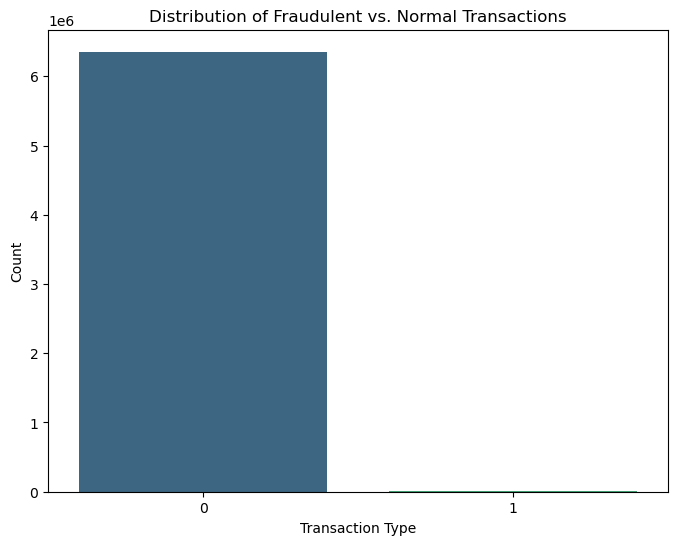

In [77]:
#calculating frauds to valid transactions

value_counts = data['isFraud'].value_counts()
print("Value Counts:\n", value_counts)
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='isFraud', order=value_counts.index, palette='viridis')
plt.title('Distribution of Fraudulent vs. Normal Transactions')  # 1 = Fraud, 0 = Normal
plt.xlabel('Transaction Type') 
plt.ylabel('Count') 
plt.show()

<h1>comparing the features with target</h1>

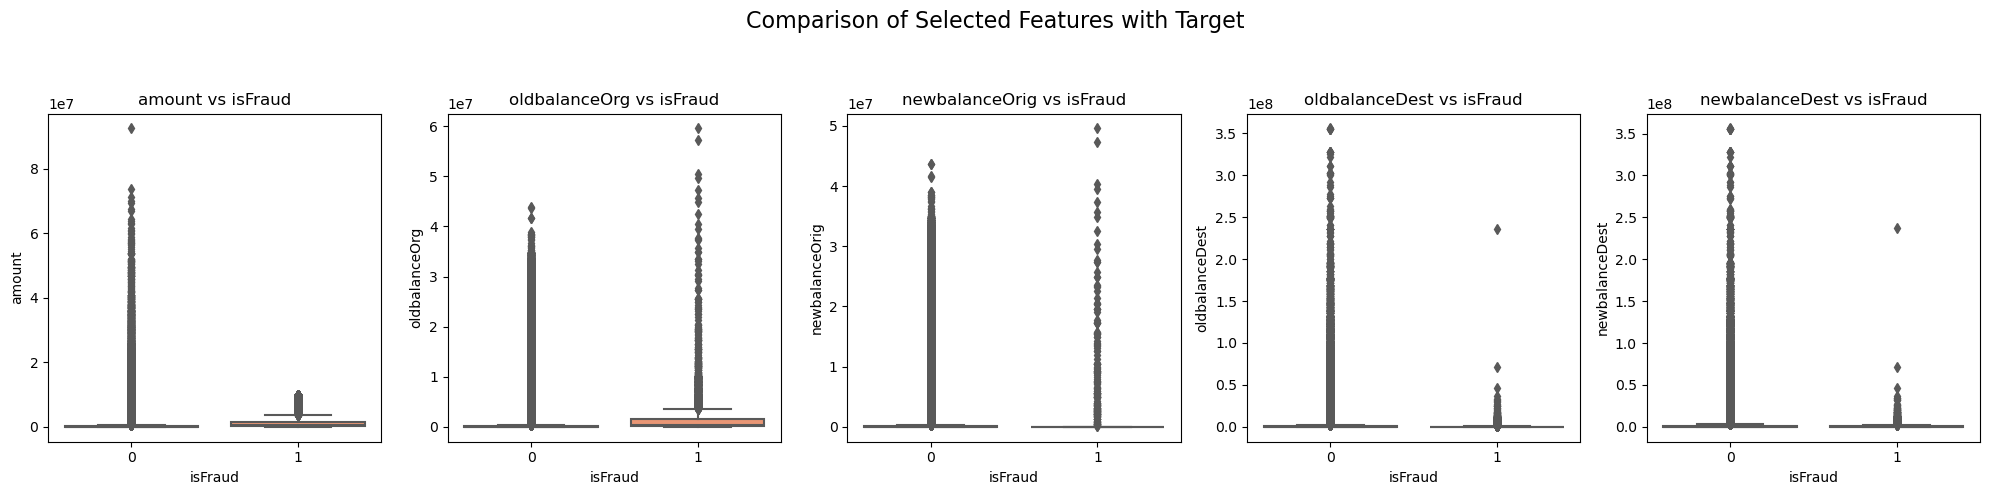

In [79]:
selected_features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
fig, axes = plt.subplots(1, len(selected_features), figsize=(20, 5))

for i, feature in enumerate(selected_features):
    sns.boxplot(x='isFraud', y=feature, data=data, ax=axes[i], palette="Set2")
    axes[i].set_title(f'{feature} vs isFraud')
    axes[i].set_xlabel('isFraud')
    axes[i].set_ylabel(feature)

plt.suptitle("Comparison of Selected Features with Target", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()


***Observations***

* **oldbalanceOrig**
Fraudsters tend to target accounts with higher balances, as these accounts allow them to transfer larger sums of money. This is evident from the higher mean balance of origin accounts in fraudulent transactions.

* **newbalanceOrig**
After transferring money, fraudsters leave little to no balance in the origin accounts. This indicates that they drain the accounts completely or nearly completely, which is a strong indicator of fraudulent activity.

* **oldbalanceDest**
Fraudsters often use destination accounts with low balances to receive money. This could imply that they prefer using new or less-monitored accounts to avoid detection.

Value Counts:
 type
0    2237484
1    2151495
2    1399284
3     532909
4      41432
Name: count, dtype: int64


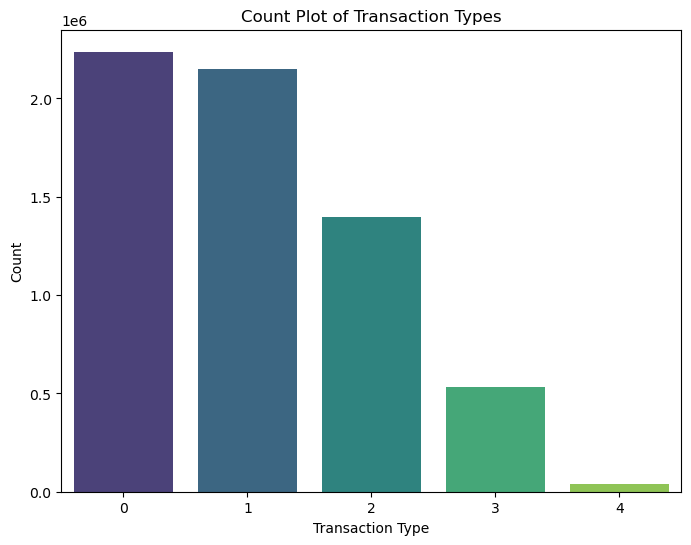

In [81]:
# most commom transaction typr
value_counts = data['type'].value_counts()
print("Value Counts:\n", value_counts)

# Plot a count plot to visualize transaction type popularity
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='type', order=value_counts.index, palette='viridis')
plt.title('Count Plot of Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()
#  0 = CASH_OUT, 1 = PAYMENT, 2 = CASH_IN, 3 = TRANSFER, 4 = DEBIT


# **part 3: Feature Engineering**

In [82]:
transaction_type_weights = {
    0: 2.0,  # CASH_OUT
    1: 1.0,  # PAYMENT
    2: 1.0,  # CASH_IN
    3: 2.0, # TRANSFER 
    4: 1.0  # DEBIT
}

# Assign weights with a default value for missing categories
data['transaction_type_weight'] = data['type'].map(lambda x: transaction_type_weights.get(x, 1.0))

In [84]:

from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
robust_scaler = RobustScaler()
 
data['amount_scaled'] = robust_scaler.fit_transform(data[['amount']])

# Apply log transformation to prevent zero dominance
data['oldbalanceOrg_log'] = np.log1p(data['oldbalanceOrg'])
data['newbalanceOrig_log'] = np.log1p(data['newbalanceOrig'])
data['oldbalanceDest_log'] = np.log1p(data['oldbalanceDest'])
data['newbalanceDest_log'] = np.log1p(data['newbalanceDest'])

print(data[['amount_scaled', 'oldbalanceOrg_log', 'newbalanceOrig_log',
                        'oldbalanceDest_log', 'newbalanceDest_log']].describe())

       amount_scaled  oldbalanceOrg_log  newbalanceOrig_log  \
count   6.362604e+06       6.362604e+06        6.362604e+06   
mean    5.374923e-01       7.414592e+00        5.366105e+00   
std     3.091448e+00       5.669751e+00        6.330027e+00   
min    -3.833107e-01       0.000000e+00        0.000000e+00   
25%    -3.147621e-01       0.000000e+00        0.000000e+00   
50%     0.000000e+00       9.561672e+00        0.000000e+00   
75%     6.852379e-01       1.158354e+01        1.187937e+01   
max     4.728903e+02       1.790292e+01        1.771920e+01   

       oldbalanceDest_log  newbalanceDest_log  
count        6.362604e+06        6.362604e+06  
mean         7.722419e+00        8.330605e+00  
std          6.747638e+00        6.675096e+00  
min          0.000000e+00        0.000000e+00  
25%          0.000000e+00        0.000000e+00  
50%          1.179590e+01        1.227682e+01  
75%          1.375686e+01        1.392159e+01  
max          1.969049e+01        1.969094e+01  


In [85]:
bins = [0, 100, 500, 1000, 5000, 10000, 50000, 100000, 1000000, float('inf')]
labels = ['0-100', '100-500', '500-1K', '1K-5K', '5K-10K', '10K-50K', '50K-100K', '100K+', '1000K+']

data['amount_bin'] = pd.cut(data['amount'], bins=bins, labels=labels)

fraud_rate = data.groupby('amount_bin')['isFraud'].agg(['count', 'sum']).rename(
    columns={'count': 'Total Transactions', 'sum': 'Fraudulent Transactions'}
)
fraud_rate['Fraud Rate'] = fraud_rate['Fraudulent Transactions'] / fraud_rate['Total Transactions']

fraud_rate = fraud_rate.reset_index()

print("Fraud Rate per Bin:")
print(fraud_rate)



Fraud Rate per Bin:
  amount_bin  Total Transactions  Fraudulent Transactions  Fraud Rate
0      0-100               14089                        2    0.000142
1    100-500               56987                       34    0.000597
2     500-1K               71554                        6    0.000084
3      1K-5K              559855                      104    0.000186
4     5K-10K              583590                      116    0.000199
5    10K-50K             1519856                      760    0.000500
6   50K-100K              719351                      669    0.000930
7      100K+             2706696                     3800    0.001404
8     1000K+              130626                     2706    0.020716


In [86]:

# prioritize the higher amount transaction
bin_weights = {
    '0-100': 1.0,
    '100-500': 1.0,
    '500-1K': 1.0,
    '1K-5K': 1.0,
    '5K-10K': 1.0,
    '10K-50K': 1.0,
    '50K-100K': 1.0,
    '100K+': 1.5,
    '1000K+': 2.0
}

data['bin_weight'] = data['amount_bin'].map(lambda x: bin_weights.get(x, 1.0))

#   **4. EDA on Transformed Data**

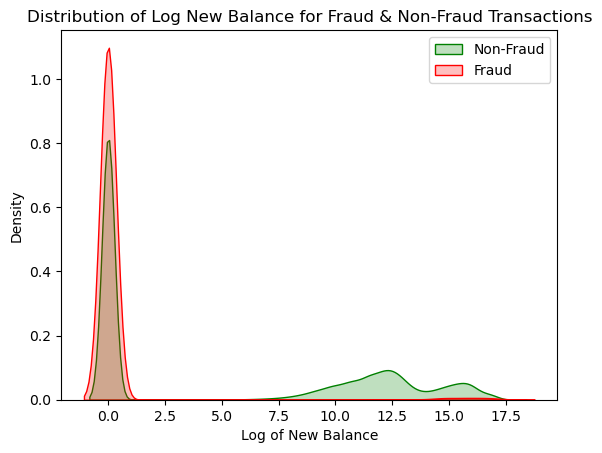

In [93]:
sns.kdeplot(data=data[data['isFraud'] == 0], 
            x='newbalanceOrig_log', label='Non-Fraud', fill=True, color='green')

sns.kdeplot(data=data[data['isFraud'] == 1], 
            x='newbalanceOrig_log', label='Fraud', fill=True, color='red')

plt.xlabel("Log of New Balance")
plt.ylabel("Density")
plt.title("Distribution of Log New Balance for Fraud & Non-Fraud Transactions")
plt.legend()
plt.show()

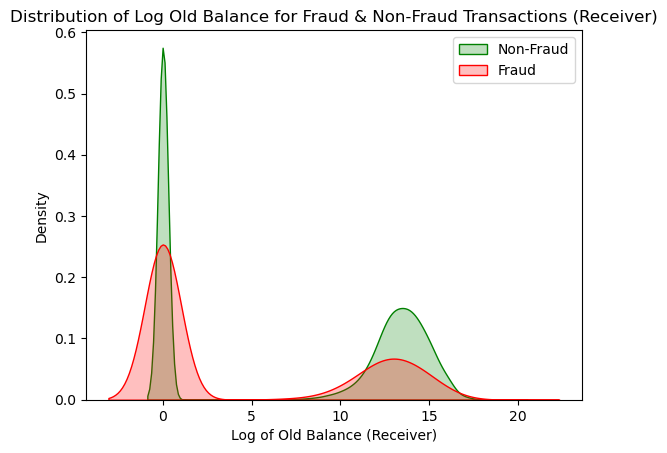

In [91]:
sns.kdeplot(data=data[data['isFraud'] == 0], 
            x='oldbalanceDest_log', label='Non-Fraud', fill=True, color='green')

sns.kdeplot(data=data[data['isFraud'] == 1], 
            x='oldbalanceDest_log', label='Fraud', fill=True, color='red')

plt.xlabel("Log of Old Balance (Receiver)")
plt.ylabel("Density")
plt.title("Distribution of Log Old Balance for Fraud & Non-Fraud Transactions (Receiver)")
plt.legend()
plt.show()


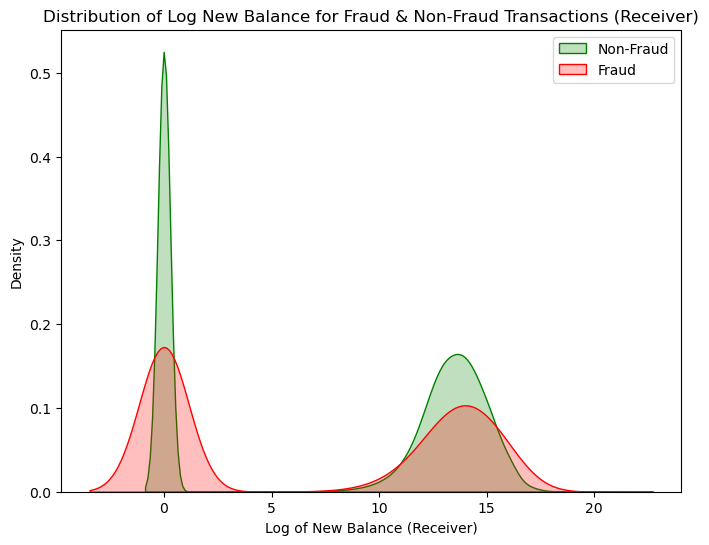

In [92]:
plt.figure(figsize=(8, 6))

sns.kdeplot(data=data[data['isFraud'] == 0], 
            x='newbalanceDest_log', label='Non-Fraud', fill=True, color='green')

sns.kdeplot(data=data[data['isFraud'] == 1], 
            x='newbalanceDest_log', label='Fraud', fill=True, color='red')

plt.xlabel("Log of New Balance (Receiver)")
plt.ylabel("Density")
plt.title("Distribution of Log New Balance for Fraud & Non-Fraud Transactions (Receiver)")
plt.legend()
plt.show()


# **5. Advanced Feature Engineering**

**Combining Weights for Enhanced Model Learning**

To further refine the model’s focus on high-risk transactions, I combined the transaction_type_weight and bin_weight into a single combined_weight column. This ensures the model prioritizes learning from transactions that are both fraud-prone in type (CASH_OUT and TRANSFER) and high-risk in amount (100K+ and 1000K+).



In [31]:
# Combine weights
data['combined_weight'] = data['transaction_type_weight'] * data['bin_weight']


**Since these columns contain missing values and are affected by outliers, I decided to fill the missing values with the median. The median is a robust measure of central tendency that is less sensitive to outliers, making it a suitable choice for this dataset.**

In [32]:

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
data[['oldbalanceOrg','oldbalanceDest','newbalanceOrig','newbalanceDest']] = imputer.fit_transform(data[['oldbalanceOrg','oldbalanceDest','newbalanceOrig','newbalanceDest']])

**To better understand how balances change during transactions, I created two new features:**

* balance_diff_Org: The difference between the origin account’s old balance (oldbalanceOrg) and new balance (newbalanceOrig). This shows how much money was deducted from the origin account.
   
* balance_diff_Dest: The difference between the destination account’s old balance (oldbalanceDest) and new balance (newbalanceDest). This shows how much money was added to the destination account.

* These features will help us analyze how balances change for both sender and receiver accounts, which could reveal patterns specific to fraudulent transactions.




In [33]:
data['balance_diff_Org'] = data['oldbalanceOrg'] - data['newbalanceOrig']
data['balance_diff_Dest']= data['oldbalanceDest'] - data['newbalanceDest']

**Scaling Log-Transformed Features**

After applying log transformations to balance_diff_Org and balance_diff_Dest, I used RobustScaler to scale these features. Robust scaling is particularly useful for handling outliers, as it uses the interquartile range (IQR) instead of the mean and standard deviation.

In [35]:
# Replace infinite values with NaN to handle potential errors
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Define columns to scale (only those that exist)
columns_to_scale = [
    'balance_diff_Org_log',
    'balance_diff_Dest_log',
    'balance_diff_Org'
]

# Ensure all columns exist before scaling
columns_to_scale = [col for col in columns_to_scale if col in data.columns]

# Initialize RobustScaler
scaler = RobustScaler()

# Apply scaling only to existing columns
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

# Display the first few rows of scaled data
print("Scaling complete. First few rows of scaled data:")
print(data.head())

Scaling complete. First few rows of scaled data:
   step  type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1     1   9839.64  C1231006815       170136.0       160296.36   
1     1     1   1864.28  C1666544295        21249.0        19384.72   
2     1     3    181.00  C1305486145          181.0            0.00   
3     1     0    181.00   C840083671          181.0            0.00   
4     1     1  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  ...  \
0  M1979787155             0.0             0.0        0  ...   
1  M2044282225             0.0             0.0        0  ...   
2   C553264065             0.0             0.0        1  ...   
3    C38997010         21182.0             0.0        1  ...   
4  M1230701703             0.0             0.0        0  ...   

   newbalanceOrig_log  oldbalanceDest_log  newbalanceDest_log  amount_bin  \
0           11.984786            0.000000                 0.0 

**WHY TO USE BOTH ?**

Both log transformation and RobustScaler were used in combination to preprocess the data. The log transformation helps normalize the distribution of skewed data by compressing large values and expanding small ones. After that, RobustScaler was applied to scale the log-transformed data, using the median and interquartile range (IQR) to ensure the model is resistant to outliers. Together, these techniques ensure the data is both more normally distributed and robust to extreme values, improving model accuracy and stability.

# **6. Model Preparation**

In [94]:
columns_to_drop = ['step','amount','oldbalanceOrg','newbalanceOrig','newbalanceDest','oldbalanceDest','isFlaggedFraud','transaction_type_weight','bin_weight','amount_bin',"nameOrig","nameDest" ]
data = data.drop(columns=columns_to_drop)
print(data.head())

   type  isFraud  amount_scaled  oldbalanceOrg_log  newbalanceOrig_log  \
0     1        0      -0.332937          12.044359           11.984786   
1     1        0      -0.373767           9.964112            9.872292   
2     3        1      -0.382384           5.204007            0.000000   
3     0        1      -0.382384           5.204007            0.000000   
4     1        0      -0.323576          10.634773           10.305174   

   oldbalanceDest_log  newbalanceDest_log  
0            0.000000                 0.0  
1            0.000000                 0.0  
2            0.000000                 0.0  
3            9.960954                 0.0  
4            0.000000                 0.0  


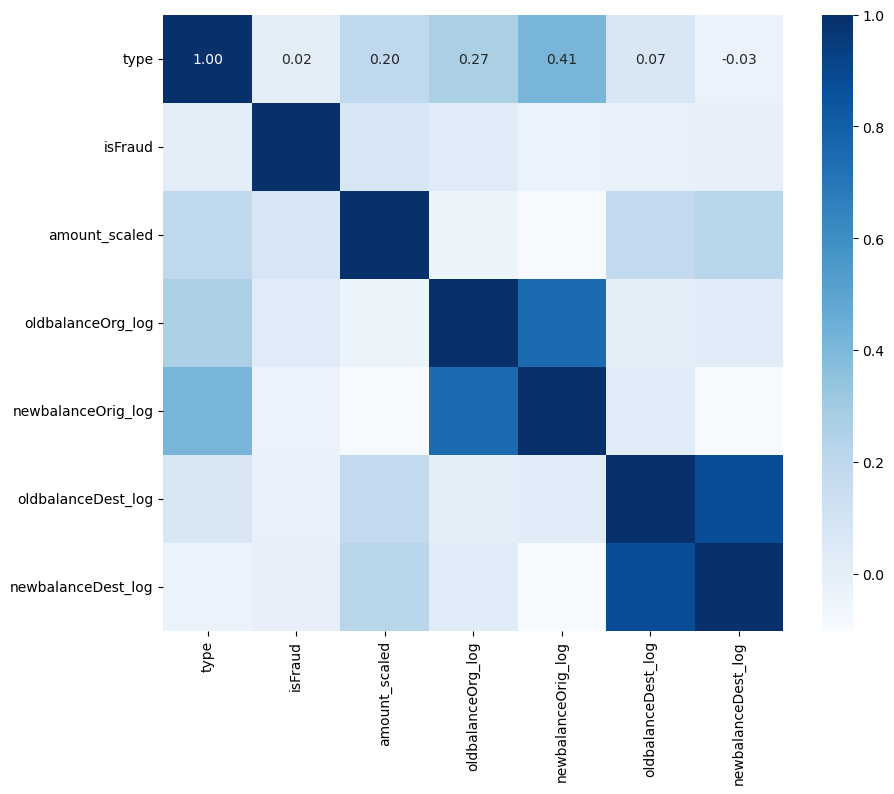

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = data.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="Blues", fmt=".2f")
plt.show()

In [99]:
data.columns

Index(['type', 'isFraud', 'amount_scaled', 'oldbalanceOrg_log',
       'newbalanceOrig_log', 'oldbalanceDest_log', 'newbalanceDest_log'],
      dtype='object')

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = data[['amount_scaled', 'oldbalanceOrg_log', 'newbalanceOrig_log', 'oldbalanceDest_log', 'balance_diff_Org']]
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns  
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]  # Calculate VIF for each feature

print(vif_data)


              Feature       VIF
0       amount_scaled  1.090552
1   oldbalanceOrg_log  5.028138
2  newbalanceOrig_log  4.708820
3  oldbalanceDest_log  1.691036
4    balance_diff_Org  1.266884


**Dropping a Feature with High Multicollinearity**


In [100]:
columns_to_drop = ['oldbalanceOrg_log']
data = data.drop(columns=columns_to_drop)
print(data.head())

   type  isFraud  amount_scaled  newbalanceOrig_log  oldbalanceDest_log  \
0     1        0      -0.332937           11.984786            0.000000   
1     1        0      -0.373767            9.872292            0.000000   
2     3        1      -0.382384            0.000000            0.000000   
3     0        1      -0.382384            0.000000            9.960954   
4     1        0      -0.323576           10.305174            0.000000   

   newbalanceDest_log  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0  


In [101]:
data

,type,isFraud,amount_scaled,newbalanceOrig_log,oldbalanceDest_log,newbalanceDest_log
0,1,0,-0.332937,11.984786,0.000000,0.000000
1,1,0,-0.373767,9.872292,0.000000,0.000000
2,3,1,-0.382384,0.000000,0.000000,0.000000
3,0,1,-0.382384,0.000000,9.960954,0.000000
4,1,0,-0.323576,10.305174,0.000000,0.000000
...,...,...,...,...,...,...
6362615,0,1,1.355688,0.000000,0.000000,12.735768
6362616,3,1,31.927868,0.000000,0.000000,0.000000
6362617,0,1,31.927868,0.000000,11.134441,15.668663
6362618,3,1,3.968266,0.000000,0.000000,0.000000


# 7: Model Building and Evaluation

In [114]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import numpy as np
import pandas as pd

X = data.drop(columns=['isFraud'])
y = data['isFraud']

rus = RandomUnderSampler(sampling_strategy=0.1, random_state=42)
X_under, y_under = rus.fit_resample(X, y)

smote = SMOTE(sampling_strategy=0.5, k_neighbors=5, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_under, y_under)

X_resampled = np.array(X_resampled)
y_resampled = np.array(y_resampled)

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled,
    test_size=0.2,
    stratify=y_resampled,
    random_state=42
)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Neural Network (MLP)": MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=200, random_state=42),
    "SGDClassifier":SGDClassifier(loss='log_loss', penalty='l1', alpha=0.0001, max_iter=1000,tol=1e-3, random_state=42, n_jobs=-1)
    
}

for name, model in models.items():
    print(f"\n===== {name} =====")
    
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", report)
    print("Confusion Matrix:\n", conf_matrix)



===== Logistic Regression =====
Accuracy: 0.8653
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90     16394
           1       0.87      0.70      0.78      8197

    accuracy                           0.87     24591
   macro avg       0.87      0.82      0.84     24591
weighted avg       0.87      0.87      0.86     24591

Confusion Matrix:
 [[15518   876]
 [ 2437  5760]]

===== Decision Tree =====
Accuracy: 0.9180
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94     16394
           1       0.87      0.88      0.88      8197

    accuracy                           0.92     24591
   macro avg       0.91      0.91      0.91     24591
weighted avg       0.92      0.92      0.92     24591

Confusion Matrix:
 [[15350  1044]
 [  972  7225]]

===== Random Forest =====
Accuracy: 0.9310
Classification Report:
               precision    recall  f

**Visualize Results** 


===== Logistic Regression =====
Accuracy: 0.8653

===== Decision Tree =====
Accuracy: 0.9180

===== Random Forest =====
Accuracy: 0.9310

===== Neural Network (MLP) =====
Accuracy: 0.9127

===== SGDClassifier =====
Accuracy: 0.7433


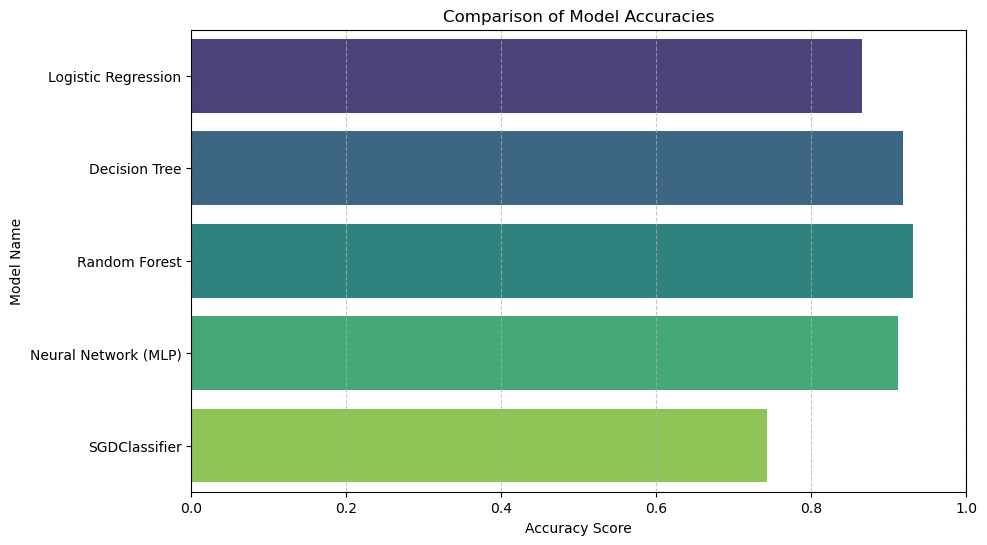

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize an empty dictionary to store model accuracies
model_accuracies = {}

# Train, predict, and evaluate
for name, model in models.items():
    print(f"\n===== {name} =====")
    
    # Fit the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[name] = accuracy
    
    print(f"Accuracy: {accuracy:.4f}")

# Convert to DataFrame for plotting
accuracy_df = pd.DataFrame(list(model_accuracies.items()), columns=['Model', 'Accuracy'])

# Plot the accuracies using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', data=accuracy_df, palette='viridis')
plt.title('Comparison of Model Accuracies')
plt.xlabel('Accuracy Score')
plt.ylabel('Model Name')
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()



===== Logistic Regression =====

===== Decision Tree =====

===== Random Forest =====

===== Neural Network (MLP) =====

===== SGDClassifier =====


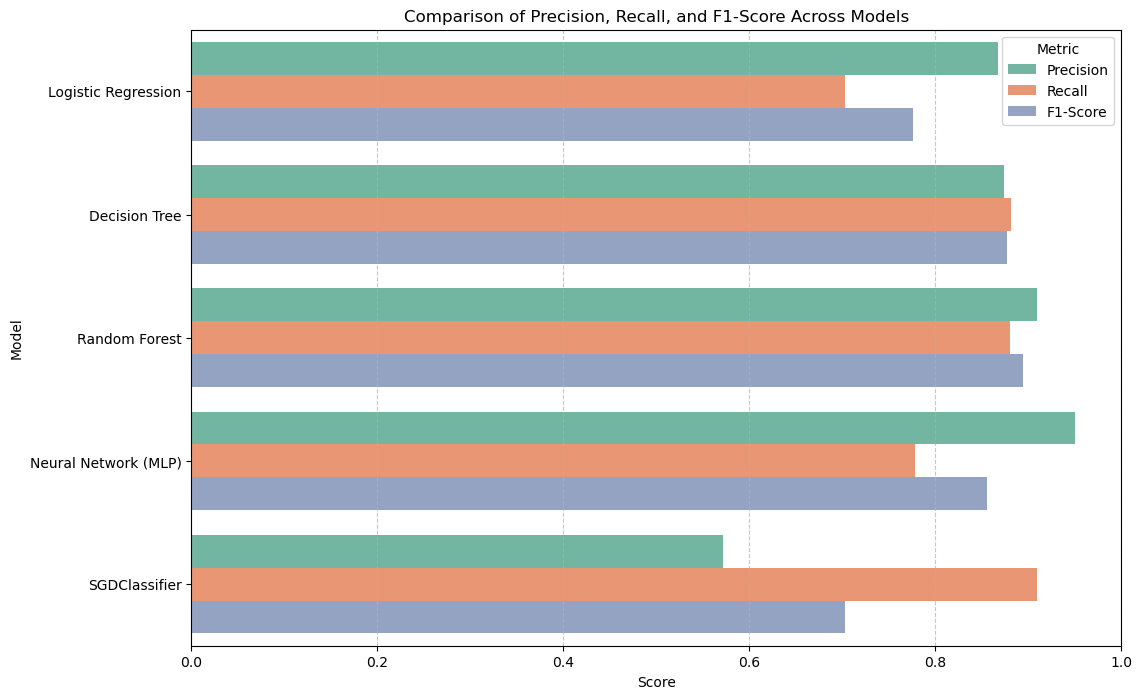

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Initialize an empty dictionary to store model metrics
model_metrics = []

# Train, predict, and evaluate
for name, model in models.items():
    print(f"\n===== {name} =====")
    
    # Fit the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Get classification report as a dictionary
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Extract Precision, Recall, and F1-Score for the Positive Class (Fraud Class - 1)
    model_metrics.append({
        'Model': name,
        'Metric': 'Precision',
        'Score': report['1']['precision']
    })
    model_metrics.append({
        'Model': name,
        'Metric': 'Recall',
        'Score': report['1']['recall']
    })
    model_metrics.append({
        'Model': name,
        'Metric': 'F1-Score',
        'Score': report['1']['f1-score']
    })

# Convert to DataFrame for plotting
metrics_df = pd.DataFrame(model_metrics)

# Plot using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Score', y='Model', hue='Metric', data=metrics_df, palette='Set2')

# Customize plot
plt.title('Comparison of Precision, Recall, and F1-Score Across Models')
plt.xlabel('Score')
plt.ylabel('Model')
plt.legend(title='Metric')
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()
